In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()


'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [2]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import seaborn as sns

../benji_girgs/points.py:193: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (n, d == other.shape)


/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [5]:
g = nk.readGraph('../loc-brightkite_edges.txt', nk.Format.EdgeListTabZero)

In [6]:
nk.overview(g)

Network Properties:
nodes, edges			58228, 214078
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000126
clustering coefficient		0.172326
min/max/avg degree		1, 1134, 7.353095
degree assortativity		0.168054
number of connected components	547
size of largest component	56739 (97.44 %)


In [14]:
with open('../loc-brightkite_totalCheckins.txt') as file:
    lines = file.readlines()

In [43]:
from tqdm import tqdm
import datetime

lines_out = []
weird = []
current = -1
currents = []
for line in tqdm(lines):
    line = line.split()
    try:
        pid, time, lat, lon, locid = line
        pid = int(pid)
        time = datetime.datetime.strptime(time, '%Y-%m-%dT%H:%M:%SZ')
        lat = float(lat)
        lon = float(lon)
        locid = locid
        lines_out.append([pid, time, lat, lon, locid])
    except Exception as e:
        weird.append(line)


100%|██████████| 4747287/4747287 [01:30<00:00, 52236.83it/s]


In [44]:
len(lines_out)

4747281

In [88]:
import pandas as pd
df = pd.DataFrame(lines_out, columns=['pid', 'time', 'lat', 'lon', 'locid'])
df['date'] = df['time'].apply(lambda x: x.date())

In [89]:
df_temp = df.loc[df['pid'] == 0].groupby('date').apply(lambda x: x.sample(1))

In [87]:
df.iloc[0].time.date()

datetime.date(2010, 10, 17)

In [49]:
import seaborn as sns
sns.scatterplot(data=df.iloc[:1000], x='lat', y='lon')

<AxesSubplot: xlabel='lat', ylabel='lon'>

Error in callback <function flush_figures at 0x2b2c9d856f70> (for post_execute):


KeyboardInterrupt: 

In [51]:
one_sample = df.groupby('pid').apply(lambda x: x.sample(1))

In [54]:
one_sample.sample(10)

,,pid,time,lat,lon,locid
pid,,,,,,
15340,3313314,15340,2009-09-02 01:13:54,35.663170,139.761278,3af2176960d11deab23003048c10834
8884,2233531,8884,2008-07-24 05:47:45,33.752136,-84.316501,4525b9a3fc63e703f446c06a19d3871fd3c0a8f8
11520,2730917,11520,2010-09-21 10:26:23,0.000000,0.000000,00000000000000000000000000000000
44699,4537679,44699,2009-06-06 19:41:09,33.506144,-112.034466,9cd33d44a62411ddb58e003048c0801e
14968,3279860,14968,2008-06-04 02:47:30,43.001143,-84.559152,ed990e92a22411ddaddf077df917622f
34488,4238018,34488,2008-05-14 20:59:04,53.414422,-2.305024,3a035706ccc2983d9aeb88c451af33b031f84a7a
22654,3737801,22654,2008-05-07 20:59:09,32.895772,-96.931813,5f9c01d265fad9fd5308f0f920973311a6791992
10754,2606275,10754,2009-05-23 04:53:29,35.648040,138.663929,46470f36474c11dea55a003048c0801e
7245,1763115,7245,2010-08-28 02:18:40,0.000000,0.000000,00000000000000000000000000000000


Latitude is +- 90 degs (+90 is north pole, -90 is south pole)

longitude is +- 180 degs (+180 is east, -180 is west), centered at greenwich.

In [70]:
one_sample.sample(5)

,,pid,time,lat,lon,locid
pid,,,,,,
17401,3462791,17401,2010-02-06 02:47:06,37.402425,-122.078330,f0f6cee78b6fabb0c081d7acd61e9d61
11796,2821800,11796,2009-05-23 20:13:40,38.086464,-97.912494,d375b08447cd11deaa3c003048c0801e
977,417821,977,2008-12-07 07:42:58,-33.949892,151.178753,cd1b891a9b6f782bd774009cc92ca16695032e2b
30657,4120782,30657,2008-07-17 07:50:05,-37.815901,144.958766,db724697a34d708fa2ebef0967b945f8e3f6328b
953,407397,953,2008-12-06 02:15:19,39.658762,-104.850062,58209dfac33311ddbb62003048c0801e


<AxesSubplot: xlabel='lon', ylabel='lat'>

(-180.0, 180.0)

(-90.0, 90.0)

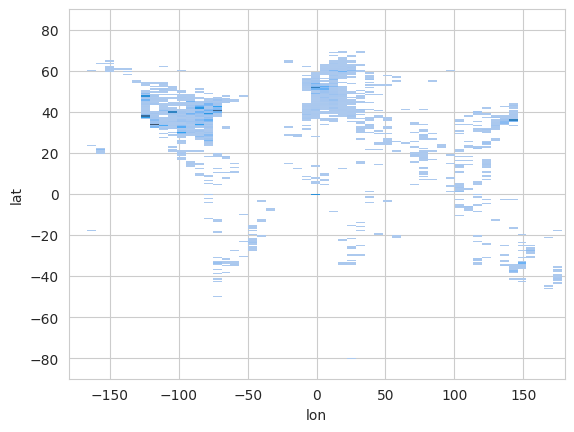

In [131]:
sns.histplot(data=one_sample.sample(30000), x='lon', y='lat')
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [92]:
df_mini = df.iloc[:50000]

In [125]:
def get_middle_lat_lon(df_temp):
    # df_temp = df_mini.loc[df_mini.pid==0]
    x, y = df_temp.lon, df_temp.lat
    lonedges = np.linspace(-180, 180, 20)
    latedges = np.linspace(-90, 90, 20)
    H, a, b = np.histogram2d(x, y, bins=(lonedges, latedges))

    lon_i, lat_i = np.unravel_index(H.argmax(), H.shape)
    lon_lo, lon_hi = lonedges[lon_i], lonedges[lon_i+1]
    lat_lo, lat_hi = latedges[lat_i], latedges[lat_i+1]
    pts_subset = df_temp.loc[(df_temp.lon >= lon_lo) & (df_temp.lon < lon_hi) & (df_temp.lat >= lat_lo) & (df_temp.lat < lat_hi), ['lon', 'lat']].values

    lon_median = np.median(pts_subset[:, 0])
    lat_median = np.median(pts_subset[:, 1])

    return lon_median, lat_median


In [127]:
df_middle_lat_lon = df.groupby('pid').apply(get_middle_lat_lon)

In [132]:
df_middle_lon_lat = df_middle_lat_lon.values

In [136]:
middle_lon_lat = np.array([x for x in df_middle_lon_lat])

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.500e+01, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.130e+02,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 3.800e+01, 1.100e+01, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.0

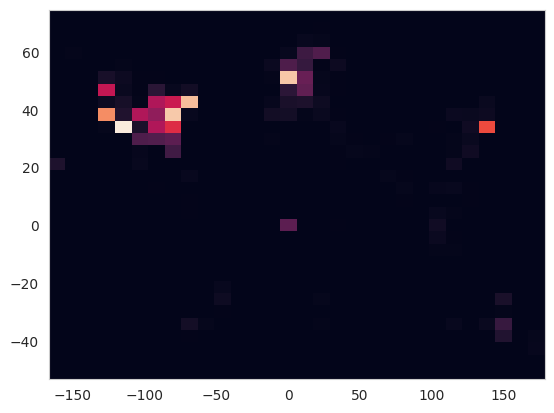

In [138]:
plt.hist2d(middle_lon_lat[:, 0], middle_lon_lat[:, 1], bins=30)

In [158]:
america = np.argwhere((middle_lon_lat[:, 0] > -130) & (middle_lon_lat[:, 0] < -60) & (middle_lon_lat[:, 1] > 20) & (middle_lon_lat[:, 1] < 50)).squeeze()

europe = np.argwhere((middle_lon_lat[:, 0] > -10) & (middle_lon_lat[:, 0] < 40) & (middle_lon_lat[:, 1] > 30) & (middle_lon_lat[:, 1] < 70)).squeeze()

In [181]:
g_america = utils.quick_subgraph(g, list(america))
# g_america2 = utils.get_largest_component(g_america)
cc = nk.components.ConnectedComponents(g_america)
cc.run()
largest_indices = np.array(cc.getComponents()[0])
g_america = nk.graphtools.subgraphFromNodes(g_america, largest_indices)

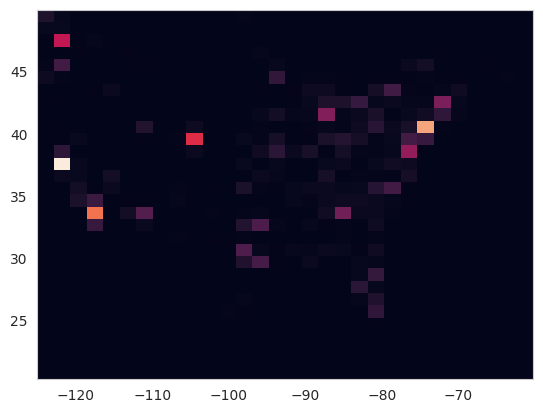

In [182]:
_ = plt.hist2d(middle_lon_lat[america, 0], middle_lon_lat[america, 1], bins=30)

In [ ]:
a, B, pts_dm = utils.get_diffmap_and_points(g_america, ds=2, process=None)

In [130]:
df_middle_lon_lat.to_csv('/cluster/home/bdayan/girgs/benji_src/brightkite_middle_lon_lat.csv')

In [121]:
pts_subset.shape

(1880, 2)

In [115]:
np.unravel_index(H.argmax(), H.shape)

(3, 13)

In [116]:
lonedges[3:3+2]
latedges[13:13+2]

array([-123.15789474, -104.21052632])

array([33.15789474, 42.63157895])

In [112]:
H.shape
lonedges.shape

(19, 19)

(20,)

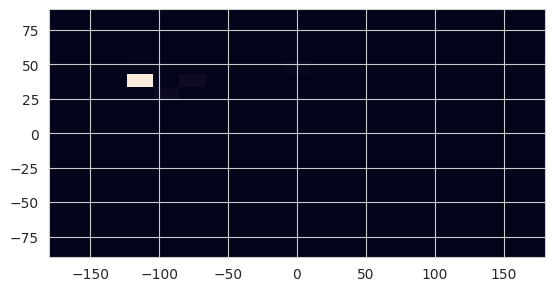

In [108]:
plt.imshow(H.T, origin='lower', interpolation='nearest', extent=[-180, 180, -90, 90])

In [ ]:
plt.hi

In [63]:
df_mini.groupby('pid').apply(lambda x: x.lat.max() - x.lat.min())

pid
0      50.025177
1      39.529633
2      51.525516
3      47.611670
4     131.665904
5      64.150000
6      43.228617
7      54.007096
8      40.008789
9      38.155750
10     52.545602
11     60.322267
12     69.508611
13     17.490711
14     40.167207
15     40.766667
16     47.500274
17     37.368961
18     61.219002
19     15.785488
20     23.867323
21     56.057888
22     31.011679
23     30.051489
24     73.131200
25     50.828385
26     69.883333
27     18.244772
28     61.061223
29     28.695635
30     60.324255
31     77.648394
32     23.541529
33     12.372968
34     47.685625
35     43.809756
36     40.823250
37     48.719610
38     24.437085
39      2.235024
40     60.170432
41     10.829810
42     42.185420
43     20.525518
44     24.004398
45     60.075278
46      4.083277
47     63.588753
dtype: float64

In [ ]:
i = 0
df_mini.loc[df_mini.pid == i].groupby('')

(-180.0, 180.0)

(-90.0, 90.0)

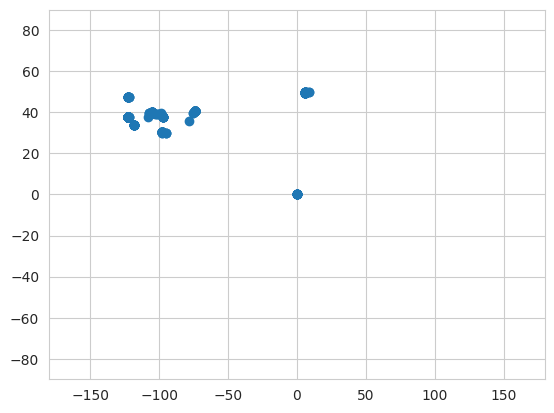

In [109]:
i = 0

plt.scatter(df_mini.loc[df_mini.pid == i].lon, df_mini.loc[df_mini.pid == i].lat)
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [73]:
df_temp = df_mini.iloc[:2100]
df_temp

,pid,time,lat,lon,locid
0,0,2010-10-17 01:48:53,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16 06:02:04,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16 03:48:54,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14 18:25:51,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14 00:21:47,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc
...,...,...,...,...,...
2095,0,2009-05-25 22:13:23,37.615223,-122.389979,be2f1e669cc111dd9a50003048c0801e
2096,0,2009-05-25 21:42:47,37.600747,-122.382376,248b82709e6c11ddbf68003048c0801e
2097,0,2009-05-25 21:37:44,37.600747,-122.382376,248b82709e6c11ddbf68003048c0801e
2098,0,2009-05-25 21:35:28,37.600747,-122.382376,248b82709e6c11ddbf68003048c0801e


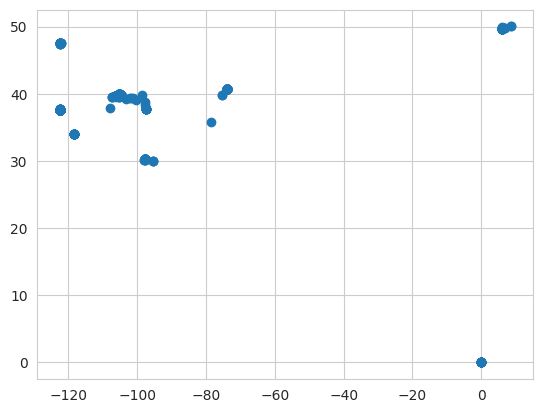

In [77]:
plt.scatter(df_mini.loc[df_mini.pid == 0].lon, df_mini.loc[df_mini.pid == 0].lat)

In [34]:
lines_out2 = []
for pid, time, lat, lon, locid in weird:
    pid = int(pid)
    time = datetime.datetime.strptime(time, '%Y-%m-%dT%H:%M:%SZ')
    lat = float(lat)
    lon = float(lon)
    locid = locid
    lines_out2.append([pid, time, lat, lon, locid])

ValueError: not enough values to unpack (expected 5, got 1)

In [37]:
len(lines_out2)

107

In [38]:
len(weird)

307

In [42]:
weird[200]

['16268',
 '2009-11-20T21:46:05Z',
 '52.5036',
 '13.3838',
 'L1iarv46z7kwvitciilc9uke4xf3krg05nu1vp6fo9v3v7leaxkp4vektr674']

In [35]:
weird[0]

['277',
 '2009-11-21T00:17:14Z',
 '47.2868',
 '-122.3078',
 'L1ia7fet8e5ool9db9u227b6ithawgz2rsid0hwskb6c0utqihyj55z6j1968']

In [26]:
pid, time, lat, lon, locid = weird[0]
pid, time, lat, lon, locid

pid = int(pid)
time = datetime.datetime.strptime(time, '%Y-%m-%dT%H:%M:%SZ')
lat = float(lat)
lon = float(lon)
locid = int(locid, 16)

('0',
 '2010-10-17T01:48:53Z',
 '39.747652',
 '-104.99251',
 '88c46bf20db295831bd2d1718ad7e6f5')

In [22]:
weird

[['0',
  '2010-10-17T01:48:53Z',
  '39.747652',
  '-104.99251',
  '88c46bf20db295831bd2d1718ad7e6f5'],
 ['0',
  '2010-10-16T06:02:04Z',
  '39.891383',
  '-105.070814',
  '7a0f88982aa015062b95e3b4843f9ca2'],
 ['0',
  '2010-10-16T03:48:54Z',
  '39.891077',
  '-105.068532',
  'dd7cd3d264c2d063832db506fba8bf79'],
 ['0',
  '2010-10-14T18:25:51Z',
  '39.750469',
  '-104.999073',
  '9848afcc62e500a01cf6fbf24b797732f8963683'],
 ['0',
  '2010-10-14T00:21:47Z',
  '39.752713',
  '-104.996337',
  '2ef143e12038c870038df53e0478cefc'],
 ['0',
  '2010-10-13T23:31:51Z',
  '39.752508',
  '-104.996637',
  '424eb3dd143292f9e013efa00486c907'],
 ['0',
  '2010-10-13T20:05:43Z',
  '39.7513',
  '-105.000121',
  'd268093afe06bd7d37d91c4d436e0c40d217b20a'],
 ['0',
  '2010-10-13T16:41:35Z',
  '39.758974',
  '-105.010853',
  '6f5b96170b7744af3c7577fa35ed0b8f'],
 ['0',
  '2010-10-13T03:57:23Z',
  '39.827022',
  '-105.143191',
  'f6f52a75fd80e27e3770cd3a87054f27'],
 ['0',
  '2010-10-12T19:56:49Z',
  '39.749934',
  '

In [13]:
lines = [x.split() for x in lines]
lines = [[int(x[0]), x[1], float(x[2]), float(x[3]), x[4]] for x in lines]

IndexError: list index out of range

In [15]:
lines[-1]

'58227\t2009-01-21T00:24:35Z\t33.833333\t35.833333\t9f6b83bca22411dd85460384f67fcdb0\n'

In [16]:
foo = '2009-01-21T00:24:35Z'
# parse foo to datetime
from datetime import datetime
datetime.strptime(foo, '%Y-%m-%dT%H:%M:%SZ')

datetime.datetime(2009, 1, 21, 0, 24, 35)

In [17]:
float('33.833333')

33.833333

In [18]:
int('9f6b83bca22411dd85460384f67fcdb0', 16)

211905499034397658685607134350486261168

In [19]:
int('a8', 16)

168